In [1]:
import os
import sys
#sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_channels
from autoencoder import network
from autoencoder import utils

/home/cjw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
datadir = "/v/Data/cyto/mmCompensatedTifs"
# datadir = "/media/cjw/Data/cyto/mmCompensatedTifs"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/v/Data/cyto/mmCompensatedTifs/Fish4_Untreated.mm', '/v/Data/cyto/mmCompensatedTifs/Fish3_CCB.mm', '/v/Data/cyto/mmCompensatedTifs/Fish4_CCB.mm', '/v/Data/cyto/mmCompensatedTifs/Fish1_Untreated.mm', '/v/Data/cyto/mmCompensatedTifs/Fish2_ICE.mm', '/v/Data/cyto/mmCompensatedTifs/Fish2_CCB.mm', '/v/Data/cyto/mmCompensatedTifs/Fish5_CCB.mm', '/v/Data/cyto/mmCompensatedTifs/Fish1_Ice.mm', '/v/Data/cyto/mmCompensatedTifs/Fish6_CCB.mm', '/v/Data/cyto/mmCompensatedTifs/Fish3_Untreated.mm', '/v/Data/cyto/mmCompensatedTifs/Fish4_ICE.mm', '/v/Data/cyto/mmCompensatedTifs/Fish6_ICE.mm', '/v/Data/cyto/mmCompensatedTifs/Fish3_ICE.mm', '/v/Data/cyto/mmCompensatedTifs/Fish6_Untreated.mm', '/v/Data/cyto/mmCompensatedTifs/Fish2_Untreated.mm', '/v/Data/cyto/mmCompensatedTifs/Fish5_Untreated.mm', '/v/Data/cyto/mmCompensatedTifs/Fish1_CCB.mm', '/v/Data/cyto/mmCompensatedTifs/Fish5_ICE.mm']
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
(4,) [10000    64    64 

dict_keys(['Fish4_Untreated.mm', 'Fish3_CCB.mm', 'Fish4_CCB.mm', 'Fish1_Untreated.mm', 'Fish2_ICE.mm', 'Fish2_CCB.mm', 'Fish5_CCB.mm', 'Fish1_Ice.mm', 'Fish6_CCB.mm', 'Fish3_Untreated.mm', 'Fish4_ICE.mm', 'Fish6_ICE.mm', 'Fish3_ICE.mm', 'Fish6_Untreated.mm', 'Fish2_Untreated.mm', 'Fish5_Untreated.mm', 'Fish1_CCB.mm', 'Fish5_ICE.mm'])

In [5]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


Encoder True
Tensor("ExpandDims:0", shape=(?, 32, 32, 1), dtype=float32) (?, 32, 32, 1)
isize:  4 32
dh0 (?, 32, 32, 1)
Encoder True
Tensor("ExpandDims_1:0", shape=(?, 32, 32, 1), dtype=float32) (?, 32, 32, 1)
isize:  4 32
dh0 (?, 32, 32, 1)
Encoder True
Tensor("ExpandDims_2:0", shape=(?, 32, 32, 1), dtype=float32) (?, 32, 32, 1)
isize:  4 32
dh0 (?, 32, 32, 1)
Encoder True
Tensor("ExpandDims_3:0", shape=(?, 32, 32, 1), dtype=float32) (?, 32, 32, 1)
isize:  4 32
dh0 (?, 32, 32, 1)
Split [<tf.Tensor 'split:0' shape=(1, ?, 64) dtype=float32>, <tf.Tensor 'split:1' shape=(1, ?, 64) dtype=float32>, <tf.Tensor 'split:2' shape=(1, ?, 64) dtype=float32>, <tf.Tensor 'split:3' shape=(1, ?, 64) dtype=float32>]
Concat [None, 256]
Stack Tensor("stack:0", shape=(4, ?, 64), dtype=float32)
Comb loss Tensor("ExpandDims_7:0", shape=(?, 32, 32, 1), dtype=float32) Tensor("strided_slice_11:0", shape=(?, 32, 32, 1), dtype=float32) Tensor("packed:0", shape=(4,), dtype=float32) [<tf.Tensor 'Sum:0' shape=() dt

/home/cjw/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


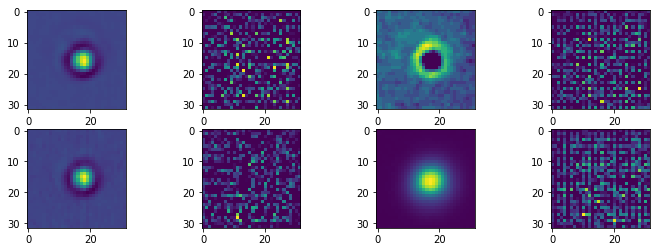

(4, 256, 64)
Epoch:  0 Iteration:  400 Loss:  890.8503
(32, 32, 4) (4, 32, 32, 1)


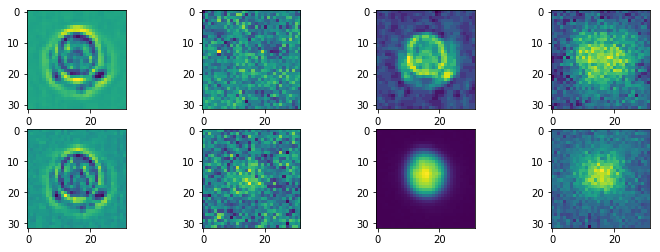

(4, 256, 64)
Epoch:  1 Iteration:  0 Loss:  701.1124
(32, 32, 4) (4, 32, 32, 1)


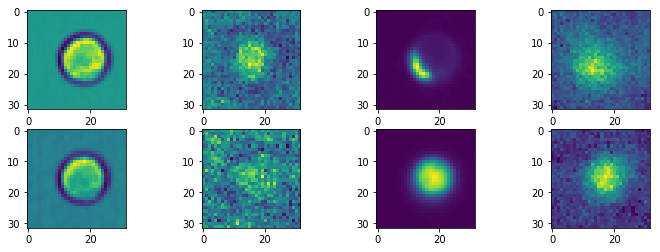

(4, 256, 64)
Epoch:  1 Iteration:  400 Loss:  583.81445
(32, 32, 4) (4, 32, 32, 1)


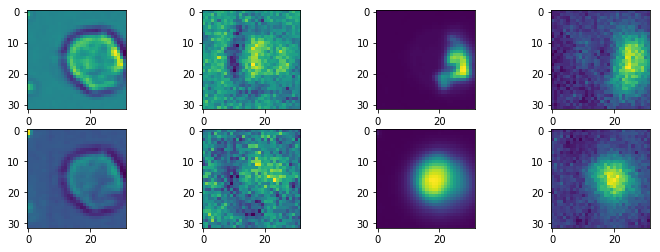

(4, 256, 64)
Epoch:  2 Iteration:  0 Loss:  473.8595
(32, 32, 4) (4, 32, 32, 1)


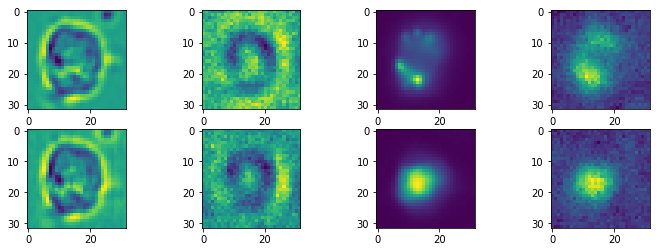

(4, 256, 64)
Epoch:  2 Iteration:  400 Loss:  420.34048
(32, 32, 4) (4, 32, 32, 1)


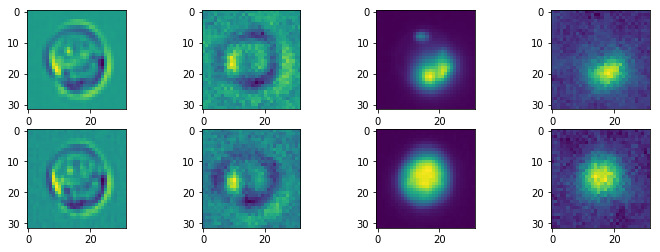

(4, 256, 64)
Epoch:  3 Iteration:  0 Loss:  360.07672
(32, 32, 4) (4, 32, 32, 1)


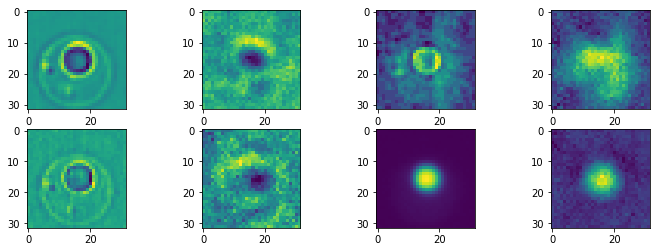

(4, 256, 64)
Epoch:  3 Iteration:  400 Loss:  341.1656
(32, 32, 4) (4, 32, 32, 1)


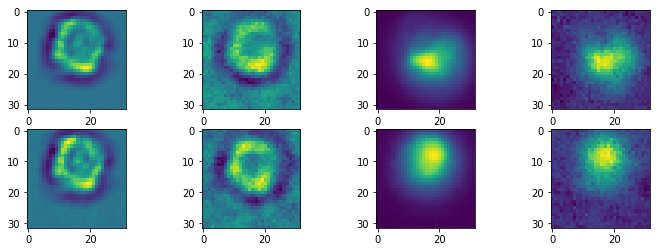

(4, 256, 64)
Epoch:  4 Iteration:  0 Loss:  290.55408
(32, 32, 4) (4, 32, 32, 1)


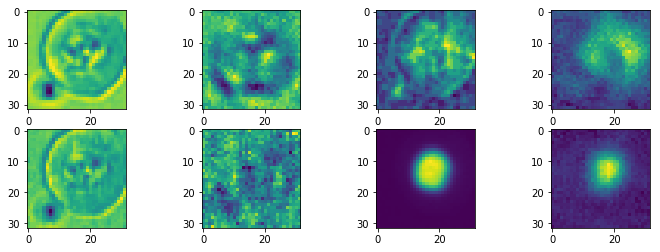

(4, 256, 64)
Epoch:  4 Iteration:  400 Loss:  281.94287
(32, 32, 4) (4, 32, 32, 1)


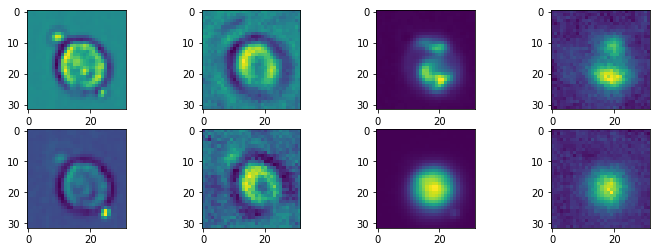

(4, 256, 64)
Epoch:  5 Iteration:  0 Loss:  261.834
(32, 32, 4) (4, 32, 32, 1)


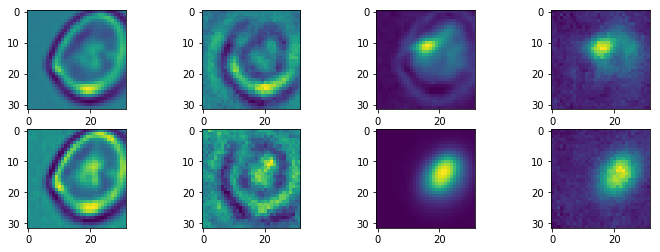

(4, 256, 64)
Epoch:  5 Iteration:  400 Loss:  237.32634
(32, 32, 4) (4, 32, 32, 1)


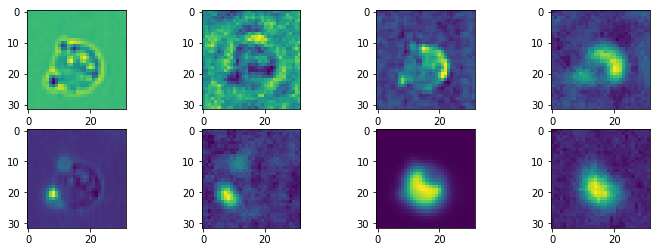

(4, 256, 64)
Epoch:  6 Iteration:  0 Loss:  218.16933
(32, 32, 4) (4, 32, 32, 1)


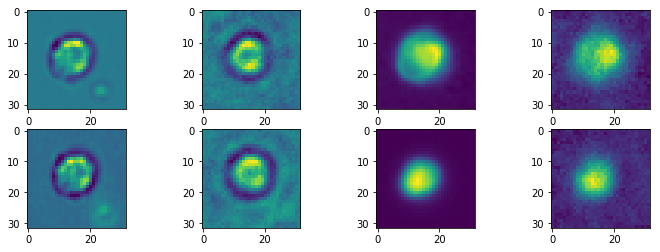

(4, 256, 64)
Epoch:  6 Iteration:  400 Loss:  213.59113
(32, 32, 4) (4, 32, 32, 1)


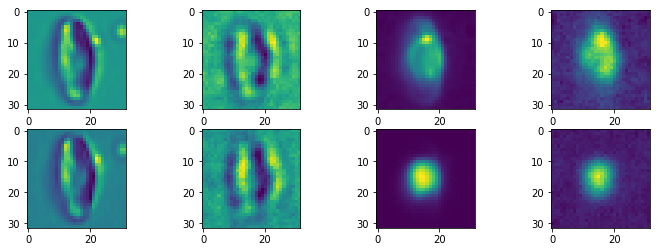

(4, 256, 64)
Epoch:  7 Iteration:  0 Loss:  202.12537
(32, 32, 4) (4, 32, 32, 1)


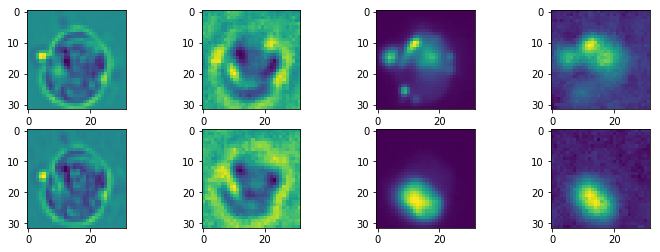

(4, 256, 64)
Epoch:  7 Iteration:  400 Loss:  197.96704
(32, 32, 4) (4, 32, 32, 1)


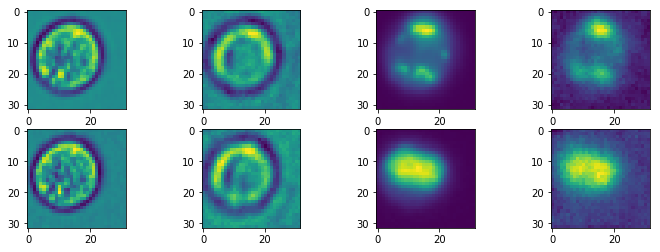

(4, 256, 64)
Epoch:  8 Iteration:  0 Loss:  188.1167
(32, 32, 4) (4, 32, 32, 1)


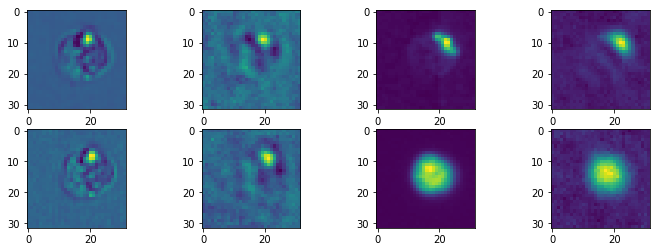

(4, 256, 64)
Epoch:  8 Iteration:  400 Loss:  182.54132
(32, 32, 4) (4, 32, 32, 1)


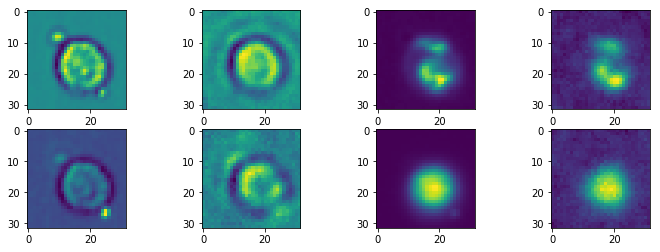

(4, 256, 64)
Epoch:  9 Iteration:  0 Loss:  170.4461
(32, 32, 4) (4, 32, 32, 1)


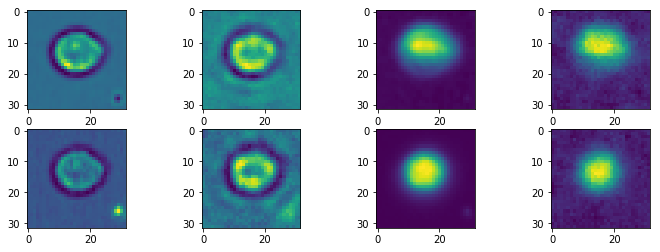

(4, 256, 64)
Epoch:  9 Iteration:  400 Loss:  172.3775
(32, 32, 4) (4, 32, 32, 1)


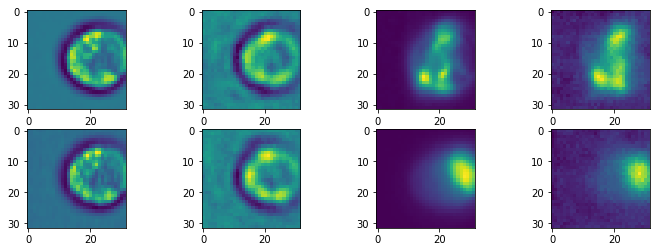

(4, 256, 64)
Epoch:  10 Iteration:  0 Loss:  161.95306
(32, 32, 4) (4, 32, 32, 1)


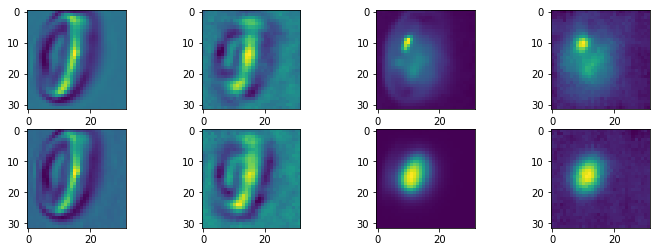

(4, 256, 64)
Epoch:  10 Iteration:  400 Loss:  163.75801
(32, 32, 4) (4, 32, 32, 1)


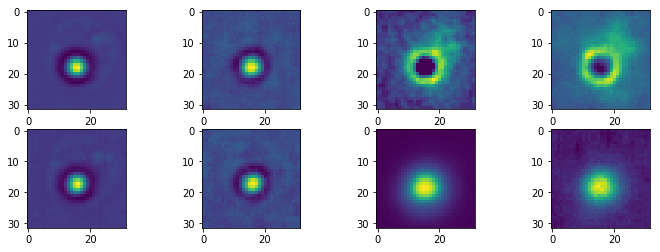

(4, 256, 64)
Epoch:  11 Iteration:  0 Loss:  152.21324
(32, 32, 4) (4, 32, 32, 1)


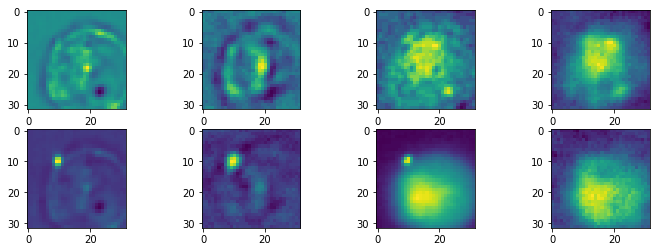

(4, 256, 64)
Epoch:  11 Iteration:  400 Loss:  157.05435
(32, 32, 4) (4, 32, 32, 1)


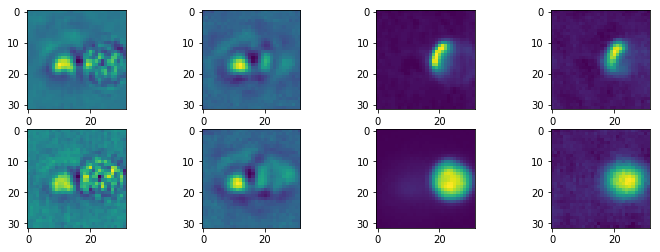

(4, 256, 64)
Epoch:  12 Iteration:  0 Loss:  145.29977
(32, 32, 4) (4, 32, 32, 1)


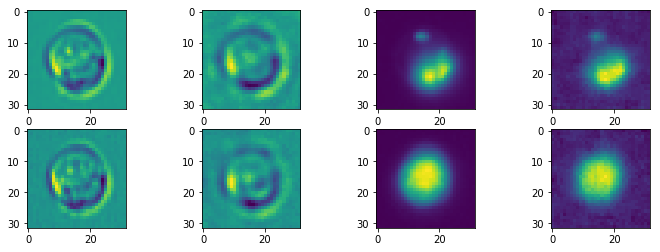

(4, 256, 64)
Epoch:  12 Iteration:  400 Loss:  149.3498
(32, 32, 4) (4, 32, 32, 1)


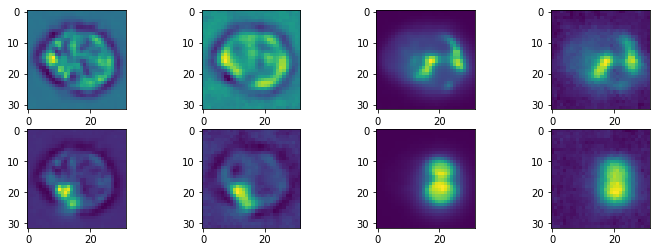

(4, 256, 64)
Epoch:  13 Iteration:  0 Loss:  138.2104
(32, 32, 4) (4, 32, 32, 1)


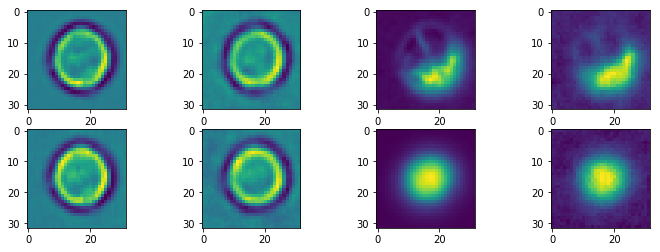

(4, 256, 64)
Epoch:  13 Iteration:  400 Loss:  142.16992
(32, 32, 4) (4, 32, 32, 1)


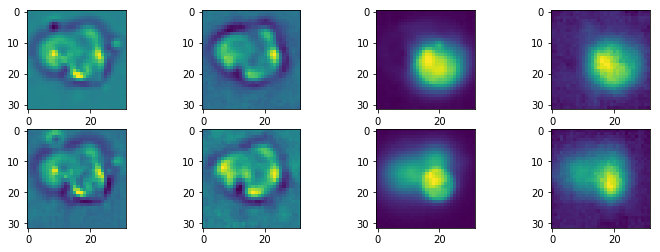

(4, 256, 64)
Epoch:  14 Iteration:  0 Loss:  133.28046
(32, 32, 4) (4, 32, 32, 1)


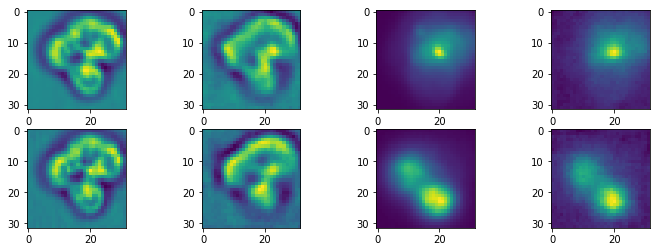

(4, 256, 64)
Epoch:  14 Iteration:  400 Loss:  136.21558
(32, 32, 4) (4, 32, 32, 1)


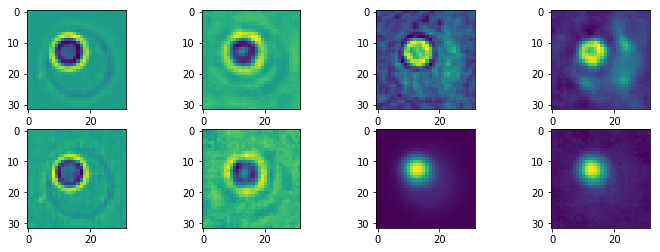

(4, 256, 64)
Epoch:  15 Iteration:  0 Loss:  126.03392
(32, 32, 4) (4, 32, 32, 1)


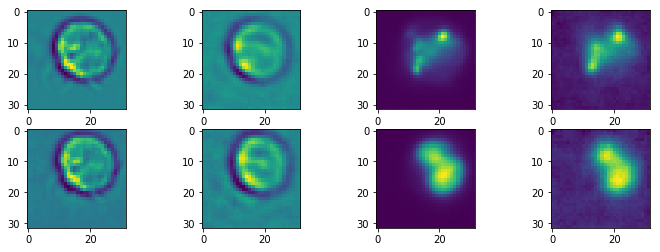

(4, 256, 64)
Epoch:  15 Iteration:  400 Loss:  130.8526
(32, 32, 4) (4, 32, 32, 1)


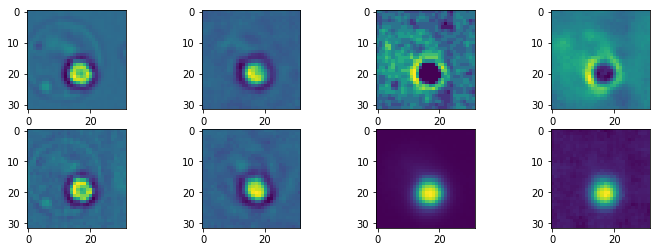

(4, 256, 64)
Epoch:  16 Iteration:  0 Loss:  122.000206
(32, 32, 4) (4, 32, 32, 1)


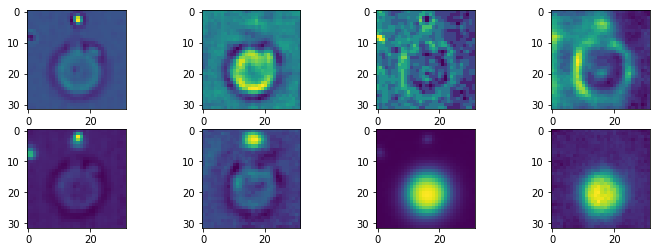

(4, 256, 64)
Epoch:  16 Iteration:  400 Loss:  126.95612
(32, 32, 4) (4, 32, 32, 1)


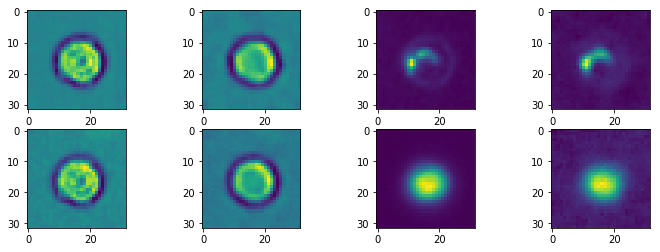

(4, 256, 64)
Epoch:  17 Iteration:  0 Loss:  118.206055
(32, 32, 4) (4, 32, 32, 1)


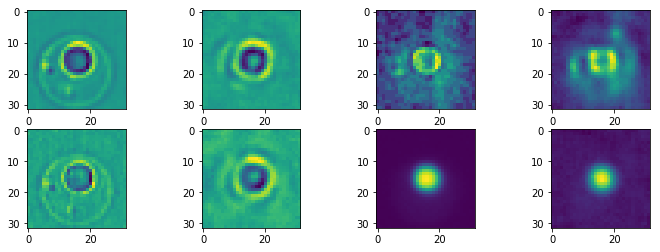

(4, 256, 64)
Epoch:  17 Iteration:  400 Loss:  122.0889
(32, 32, 4) (4, 32, 32, 1)


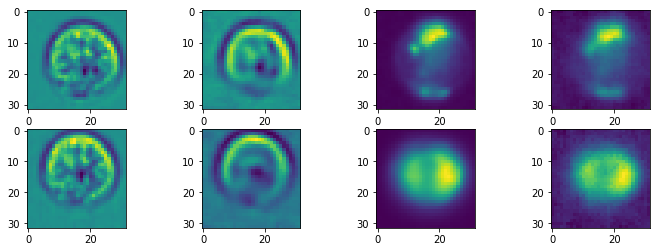

(4, 256, 64)
Epoch:  18 Iteration:  0 Loss:  112.973694
(32, 32, 4) (4, 32, 32, 1)


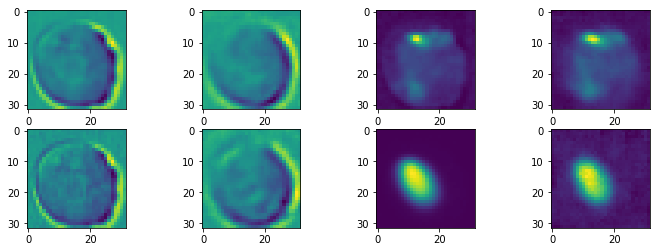

(4, 256, 64)
Epoch:  18 Iteration:  400 Loss:  118.34861
(32, 32, 4) (4, 32, 32, 1)


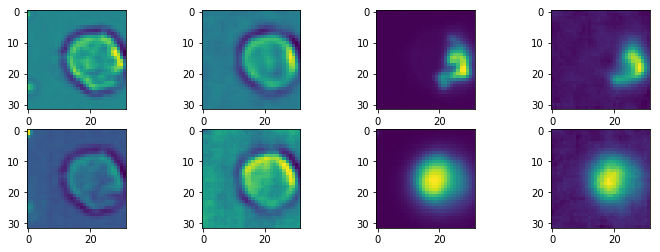

(4, 256, 64)
Epoch:  19 Iteration:  0 Loss:  109.49332
(32, 32, 4) (4, 32, 32, 1)


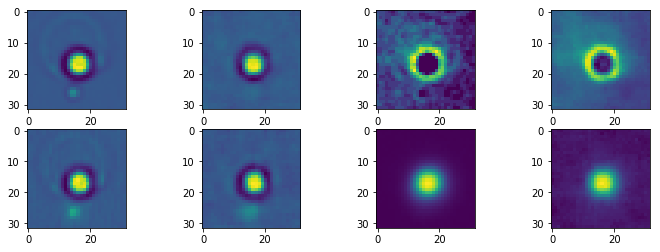

(4, 256, 64)
Epoch:  19 Iteration:  400 Loss:  115.65155
(32, 32, 4) (4, 32, 32, 1)


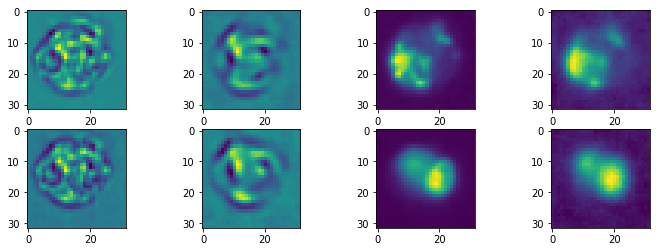

(4, 256, 64)
Epoch:  20 Iteration:  0 Loss:  107.79474
(32, 32, 4) (4, 32, 32, 1)


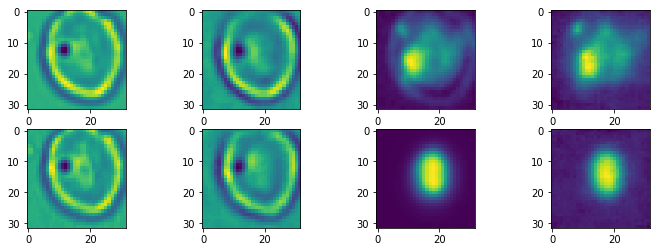

(4, 256, 64)
Epoch:  20 Iteration:  400 Loss:  113.07565
(32, 32, 4) (4, 32, 32, 1)


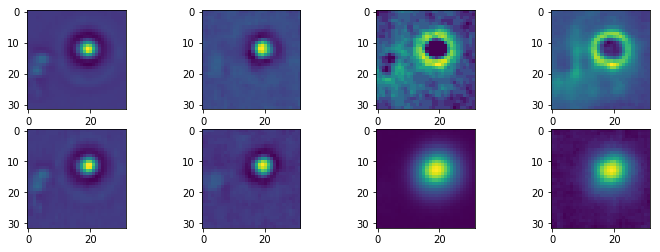

(4, 256, 64)
Epoch:  21 Iteration:  0 Loss:  104.55481
(32, 32, 4) (4, 32, 32, 1)


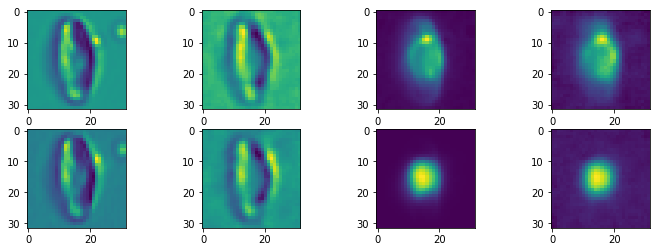

(4, 256, 64)
Epoch:  21 Iteration:  400 Loss:  110.30193
(32, 32, 4) (4, 32, 32, 1)


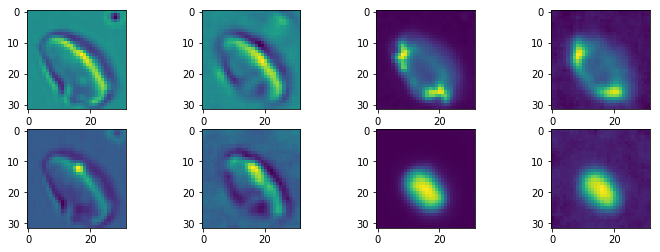

(4, 256, 64)
Epoch:  22 Iteration:  0 Loss:  102.80544
(32, 32, 4) (4, 32, 32, 1)


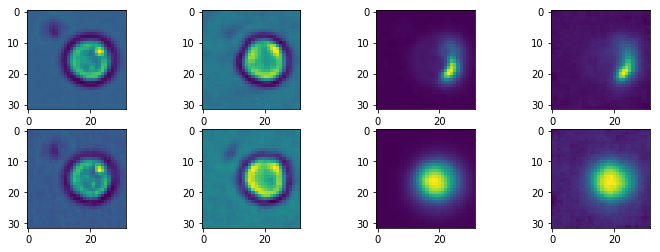

(4, 256, 64)
Epoch:  22 Iteration:  400 Loss:  106.63086
(32, 32, 4) (4, 32, 32, 1)


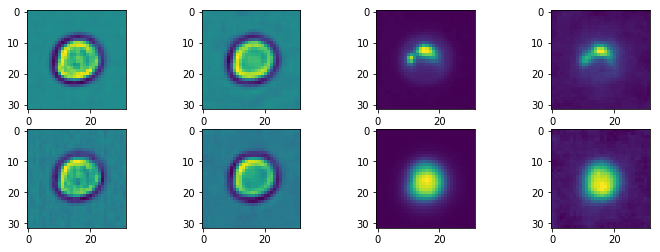

(4, 256, 64)
Epoch:  23 Iteration:  0 Loss:  100.12993
(32, 32, 4) (4, 32, 32, 1)


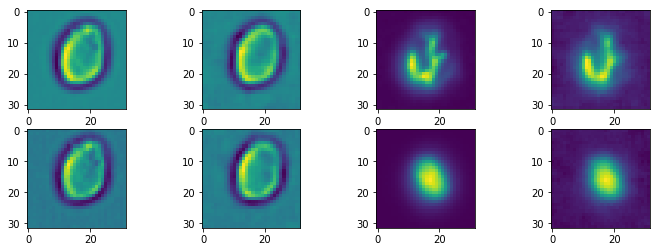

(4, 256, 64)
Epoch:  23 Iteration:  400 Loss:  106.01402
(32, 32, 4) (4, 32, 32, 1)


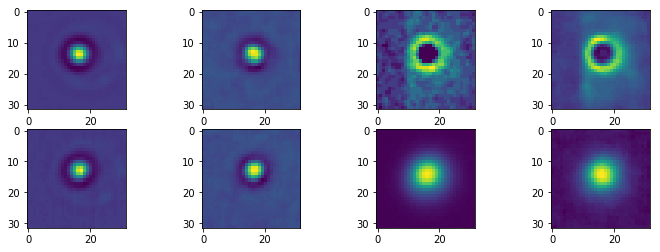

(4, 256, 64)
Epoch:  24 Iteration:  0 Loss:  98.55411
(32, 32, 4) (4, 32, 32, 1)


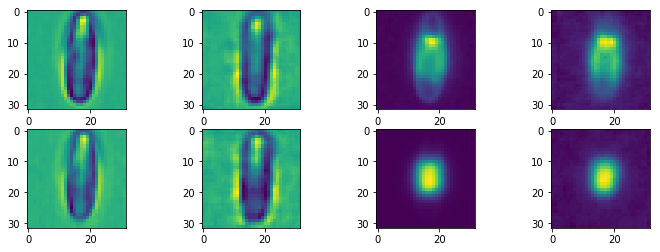

(4, 256, 64)
Epoch:  24 Iteration:  400 Loss:  104.71376
(32, 32, 4) (4, 32, 32, 1)


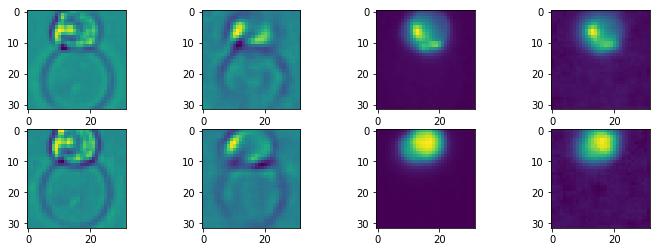

(4, 256, 64)
Epoch:  25 Iteration:  0 Loss:  96.86824
(32, 32, 4) (4, 32, 32, 1)


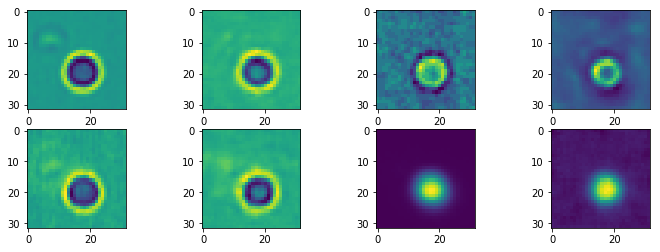

(4, 256, 64)
Epoch:  25 Iteration:  400 Loss:  101.969955
(32, 32, 4) (4, 32, 32, 1)


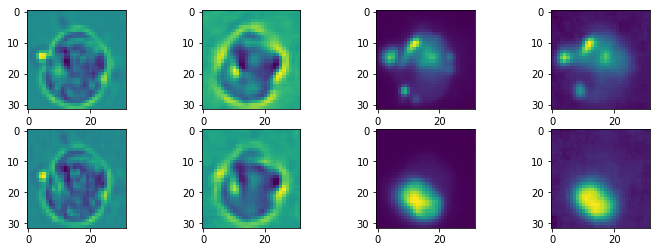

(4, 256, 64)
Epoch:  26 Iteration:  0 Loss:  95.551865
(32, 32, 4) (4, 32, 32, 1)


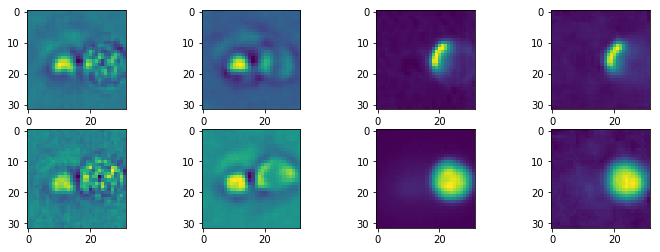

(4, 256, 64)
Epoch:  26 Iteration:  400 Loss:  100.05372
(32, 32, 4) (4, 32, 32, 1)


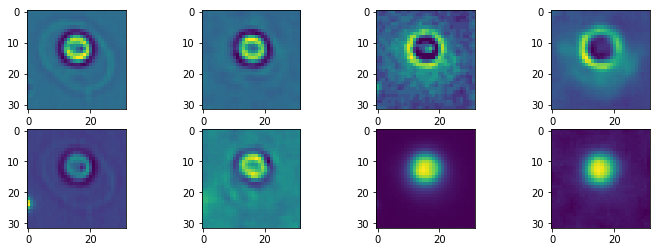

(4, 256, 64)
Epoch:  27 Iteration:  0 Loss:  93.33638
(32, 32, 4) (4, 32, 32, 1)


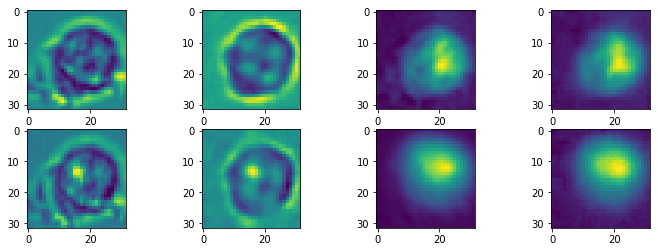

(4, 256, 64)
Epoch:  27 Iteration:  400 Loss:  99.245285
(32, 32, 4) (4, 32, 32, 1)


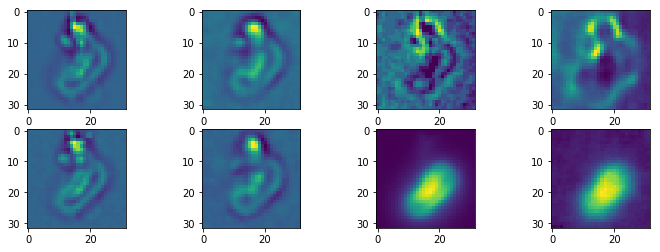

(4, 256, 64)
Epoch:  28 Iteration:  0 Loss:  92.761536
(32, 32, 4) (4, 32, 32, 1)


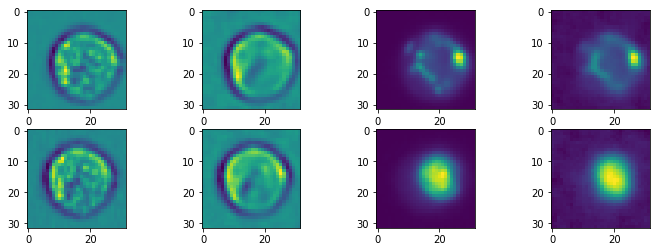

(4, 256, 64)
Epoch:  28 Iteration:  400 Loss:  97.7193
(32, 32, 4) (4, 32, 32, 1)


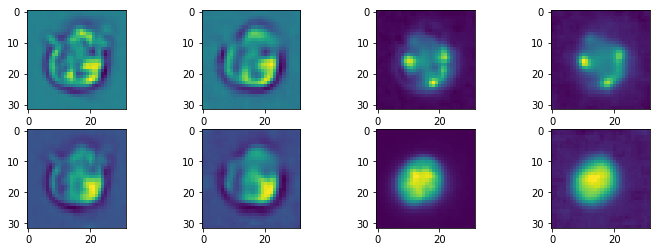

(4, 256, 64)
Epoch:  29 Iteration:  0 Loss:  92.009186
(32, 32, 4) (4, 32, 32, 1)


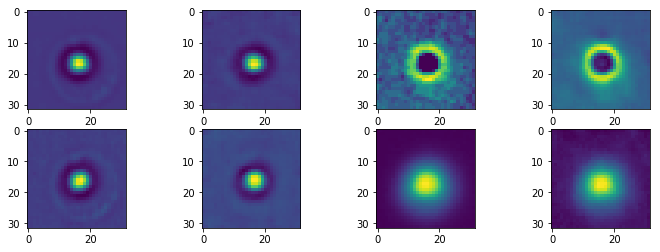

(4, 256, 64)
Epoch:  29 Iteration:  400 Loss:  96.25177
(32, 32, 4) (4, 32, 32, 1)


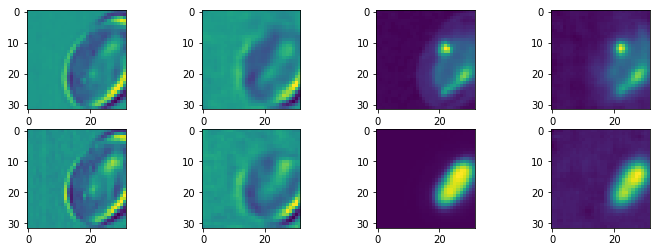

(4, 256, 64)
Epoch:  30 Iteration:  0 Loss:  90.37987
(32, 32, 4) (4, 32, 32, 1)


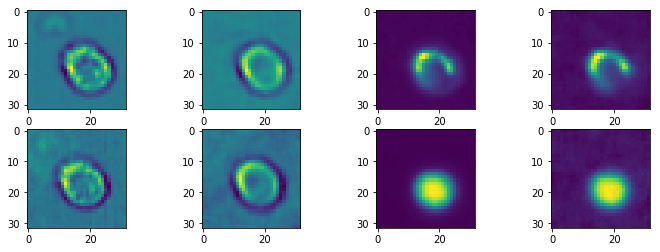

(4, 256, 64)
Epoch:  30 Iteration:  400 Loss:  96.41587
(32, 32, 4) (4, 32, 32, 1)


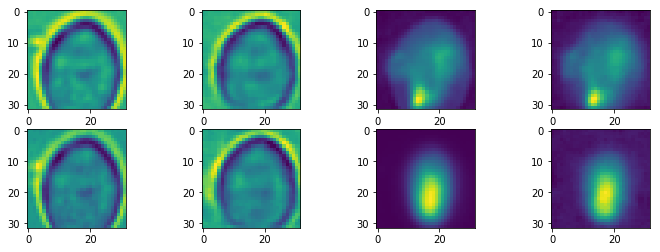

(4, 256, 64)
Epoch:  31 Iteration:  0 Loss:  89.12674
(32, 32, 4) (4, 32, 32, 1)


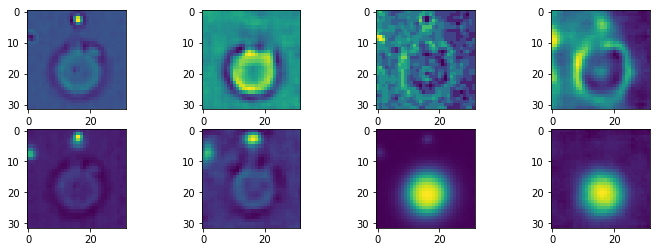

(4, 256, 64)
Epoch:  31 Iteration:  400 Loss:  96.240135
(32, 32, 4) (4, 32, 32, 1)


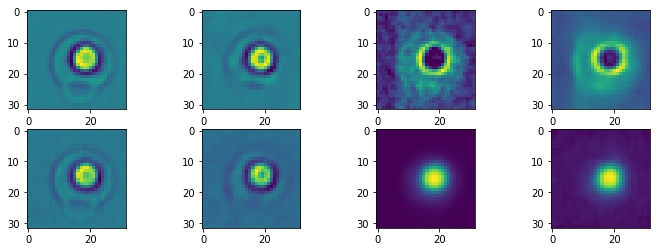

(4, 256, 64)
Epoch:  32 Iteration:  0 Loss:  89.124725
(32, 32, 4) (4, 32, 32, 1)


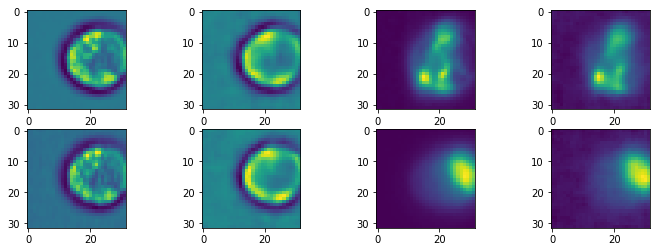

(4, 256, 64)
Epoch:  32 Iteration:  400 Loss:  93.41374
(32, 32, 4) (4, 32, 32, 1)


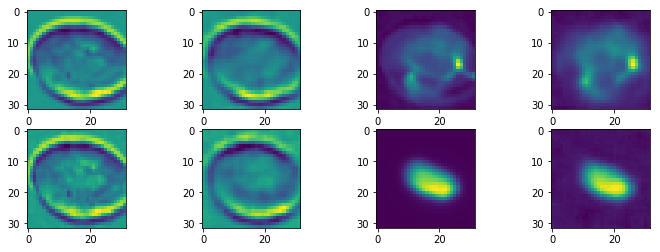

(4, 256, 64)
Epoch:  33 Iteration:  0 Loss:  89.16023
(32, 32, 4) (4, 32, 32, 1)


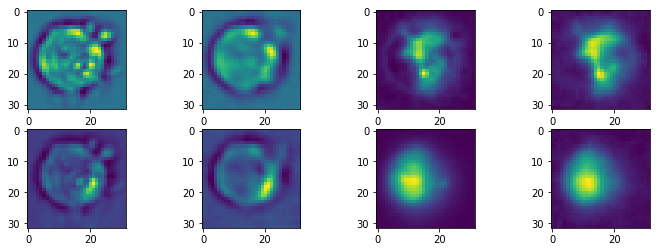

(4, 256, 64)
Epoch:  33 Iteration:  400 Loss:  93.65036
(32, 32, 4) (4, 32, 32, 1)


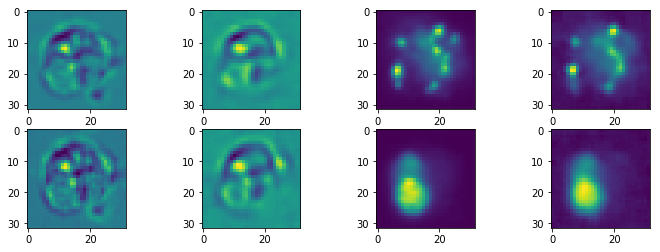

(4, 256, 64)
Epoch:  34 Iteration:  0 Loss:  86.46368
(32, 32, 4) (4, 32, 32, 1)


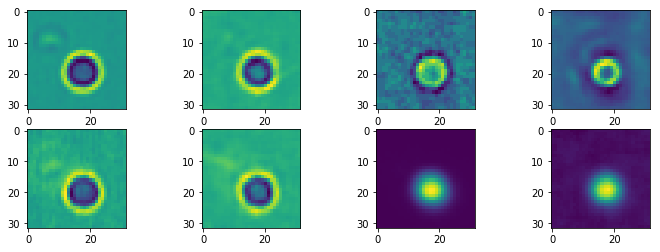

(4, 256, 64)
Epoch:  34 Iteration:  400 Loss:  92.08402
(32, 32, 4) (4, 32, 32, 1)


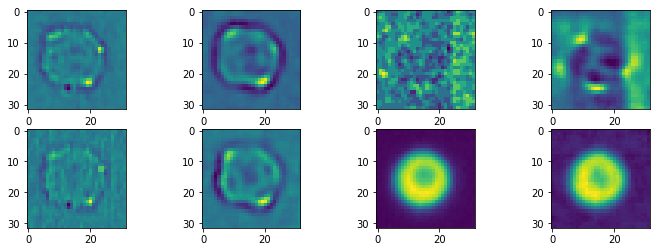

(4, 256, 64)
Epoch:  35 Iteration:  0 Loss:  87.06357
(32, 32, 4) (4, 32, 32, 1)


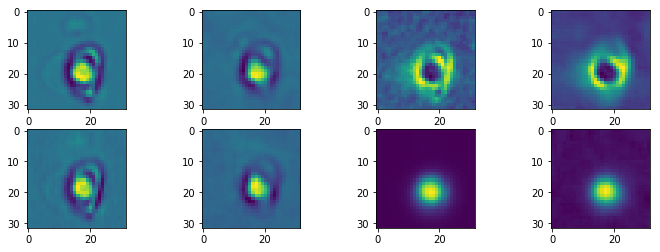

(4, 256, 64)
Epoch:  35 Iteration:  400 Loss:  92.08228
(32, 32, 4) (4, 32, 32, 1)


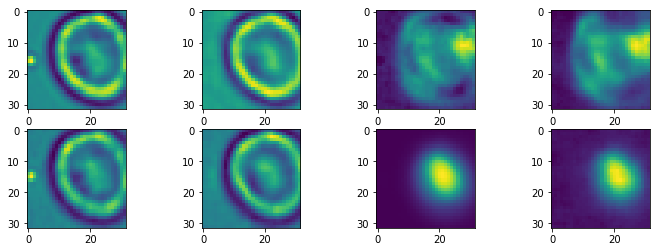

(4, 256, 64)
Epoch:  36 Iteration:  0 Loss:  86.91853
(32, 32, 4) (4, 32, 32, 1)


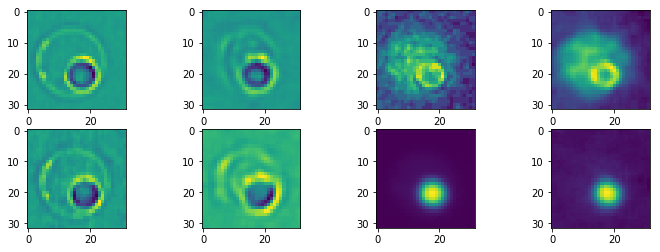

(4, 256, 64)
Epoch:  36 Iteration:  400 Loss:  90.18661
(32, 32, 4) (4, 32, 32, 1)


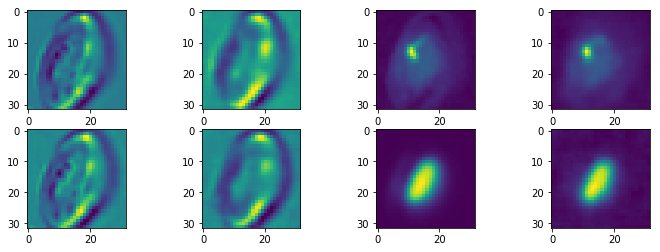

(4, 256, 64)
Epoch:  37 Iteration:  0 Loss:  85.0403
(32, 32, 4) (4, 32, 32, 1)


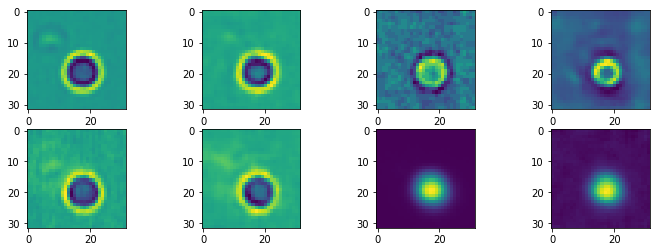

(4, 256, 64)
Epoch:  37 Iteration:  400 Loss:  90.91407
(32, 32, 4) (4, 32, 32, 1)


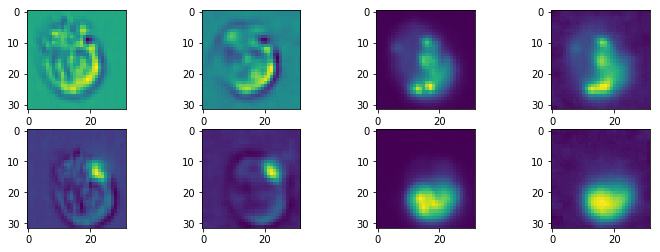

(4, 256, 64)
Epoch:  38 Iteration:  0 Loss:  84.14491
(32, 32, 4) (4, 32, 32, 1)


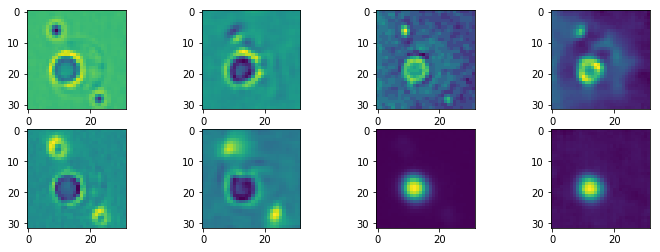

(4, 256, 64)
Epoch:  38 Iteration:  400 Loss:  89.57401
(32, 32, 4) (4, 32, 32, 1)


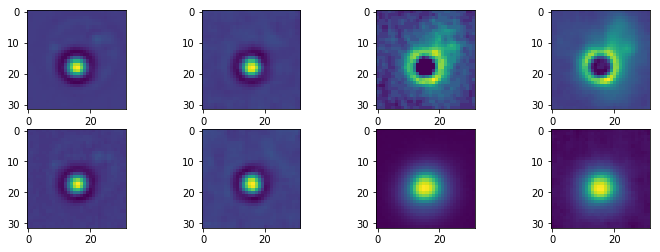

(4, 256, 64)
Epoch:  39 Iteration:  0 Loss:  83.165924
(32, 32, 4) (4, 32, 32, 1)


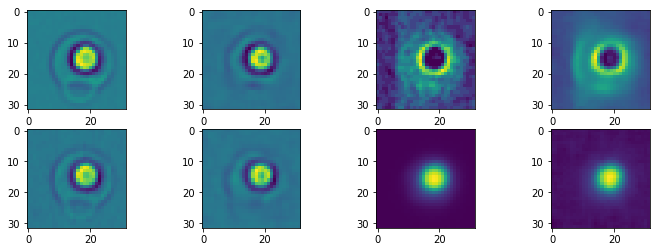

(4, 256, 64)
Epoch:  39 Iteration:  400 Loss:  90.17428
(32, 32, 4) (4, 32, 32, 1)


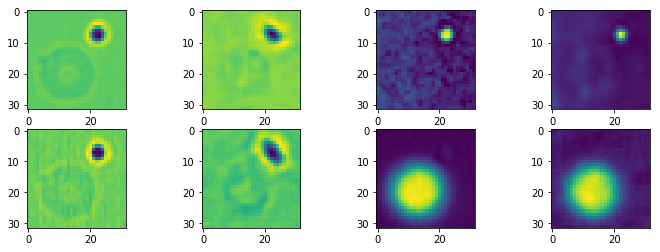

(4, 256, 64)
Epoch:  40 Iteration:  0 Loss:  83.631516
(32, 32, 4) (4, 32, 32, 1)


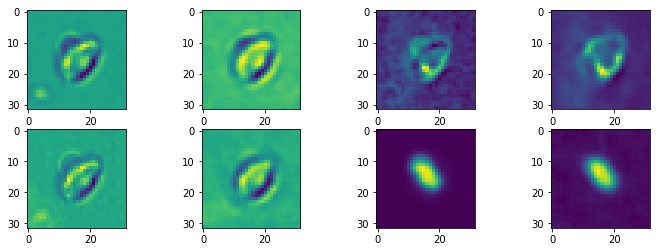

(4, 256, 64)
Epoch:  40 Iteration:  400 Loss:  88.43634
(32, 32, 4) (4, 32, 32, 1)


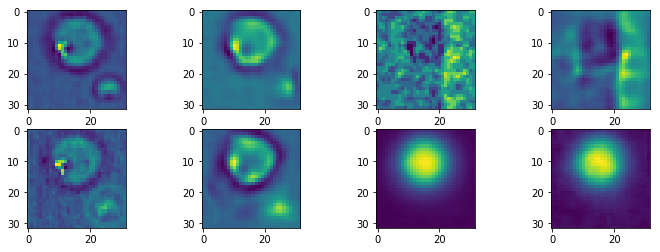

(4, 256, 64)
Epoch:  41 Iteration:  0 Loss:  81.90416
(32, 32, 4) (4, 32, 32, 1)


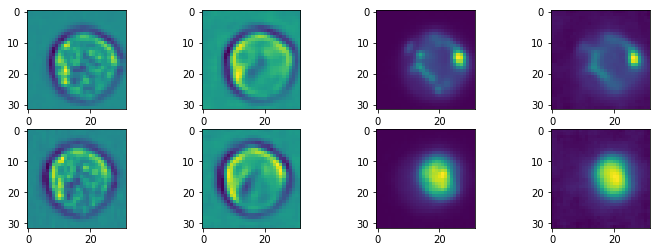

(4, 256, 64)
Epoch:  41 Iteration:  400 Loss:  87.771255
(32, 32, 4) (4, 32, 32, 1)


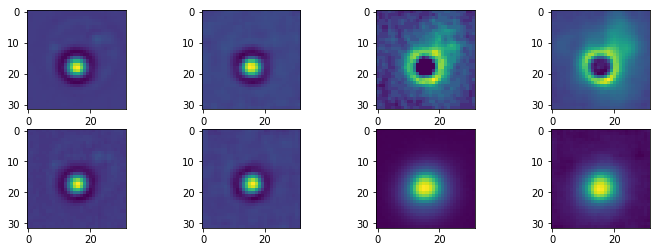

(4, 256, 64)
Epoch:  42 Iteration:  0 Loss:  82.89809
(32, 32, 4) (4, 32, 32, 1)


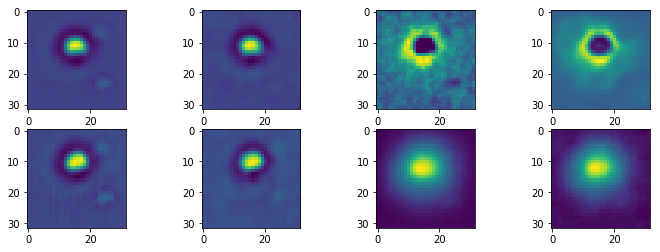

(4, 256, 64)
Epoch:  42 Iteration:  400 Loss:  86.945145
(32, 32, 4) (4, 32, 32, 1)


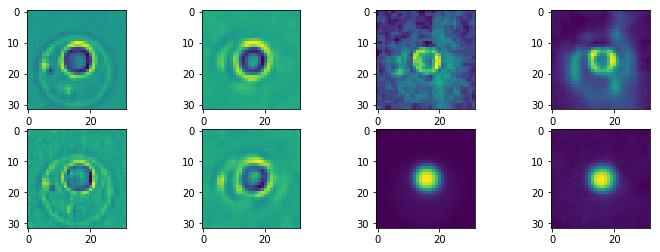

(4, 256, 64)
Epoch:  43 Iteration:  0 Loss:  82.07337
(32, 32, 4) (4, 32, 32, 1)


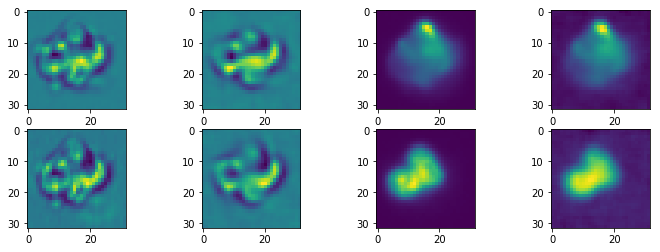

(4, 256, 64)
Epoch:  43 Iteration:  400 Loss:  86.70432
(32, 32, 4) (4, 32, 32, 1)


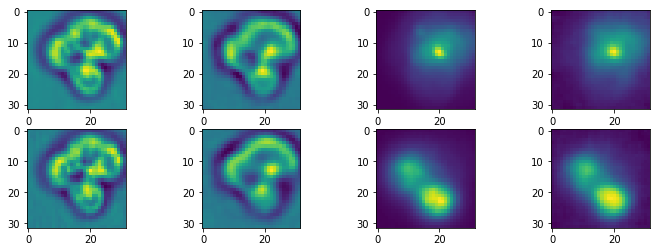

(4, 256, 64)
Epoch:  44 Iteration:  0 Loss:  81.79828
(32, 32, 4) (4, 32, 32, 1)


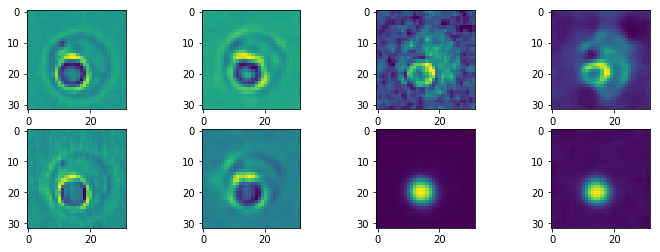

(4, 256, 64)
Epoch:  44 Iteration:  400 Loss:  86.40791
(32, 32, 4) (4, 32, 32, 1)


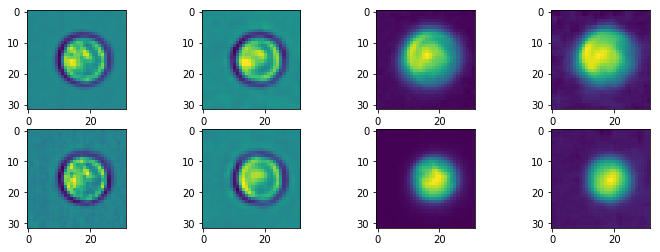

(4, 256, 64)
Epoch:  45 Iteration:  0 Loss:  80.938354
(32, 32, 4) (4, 32, 32, 1)


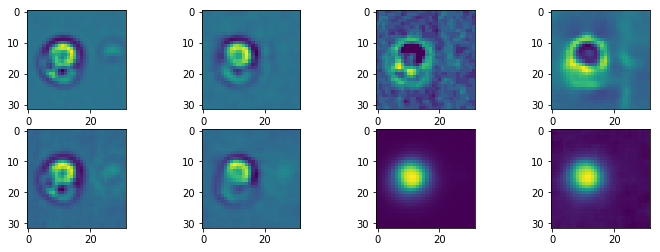

(4, 256, 64)
Epoch:  45 Iteration:  400 Loss:  86.69928
(32, 32, 4) (4, 32, 32, 1)


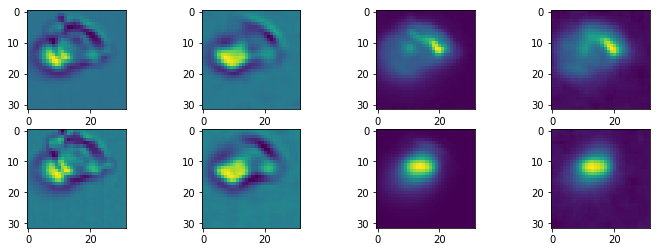

(4, 256, 64)
Epoch:  46 Iteration:  0 Loss:  80.98857
(32, 32, 4) (4, 32, 32, 1)


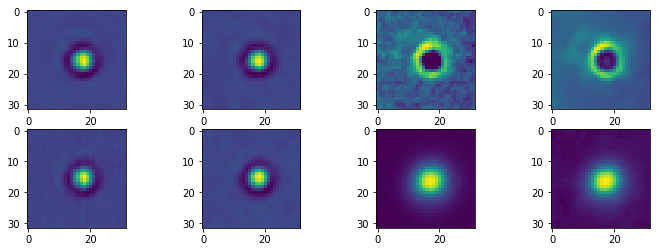

(4, 256, 64)
Epoch:  46 Iteration:  400 Loss:  87.227295
(32, 32, 4) (4, 32, 32, 1)


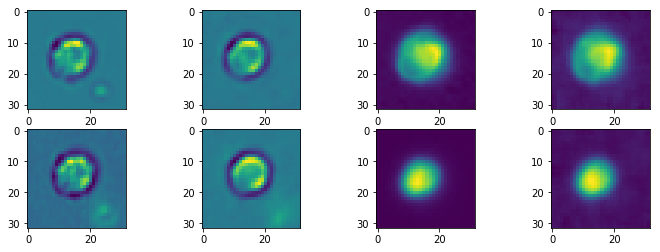

(4, 256, 64)
Epoch:  47 Iteration:  0 Loss:  80.21719
(32, 32, 4) (4, 32, 32, 1)


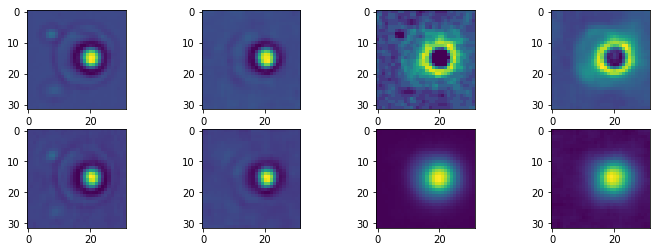

(4, 256, 64)
Epoch:  47 Iteration:  400 Loss:  84.985794
(32, 32, 4) (4, 32, 32, 1)


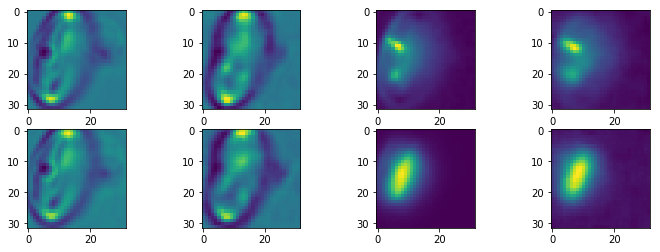

(4, 256, 64)
Epoch:  48 Iteration:  0 Loss:  79.77059
(32, 32, 4) (4, 32, 32, 1)


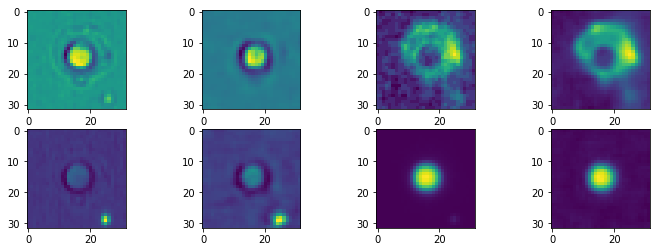

(4, 256, 64)
Epoch:  48 Iteration:  400 Loss:  85.531075
(32, 32, 4) (4, 32, 32, 1)


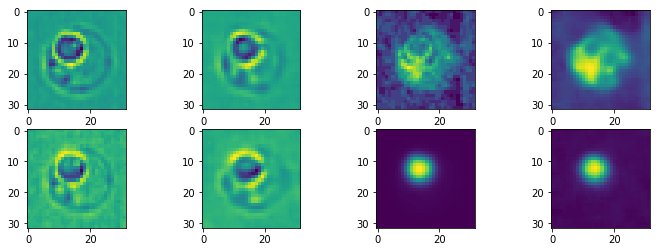

(4, 256, 64)
Epoch:  49 Iteration:  0 Loss:  79.72524
(32, 32, 4) (4, 32, 32, 1)


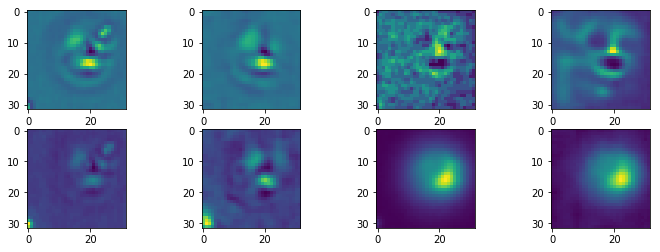

(4, 256, 64)
Epoch:  49 Iteration:  400 Loss:  85.66397
(32, 32, 4) (4, 32, 32, 1)


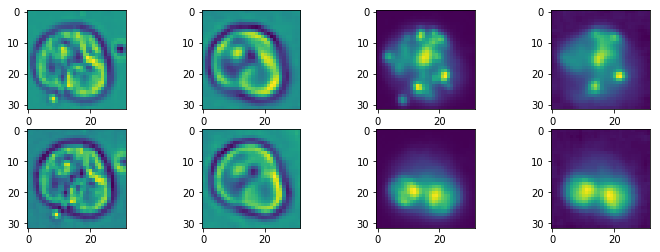

(4, 256, 64)
Epoch:  50 Iteration:  0 Loss:  79.06822
(32, 32, 4) (4, 32, 32, 1)


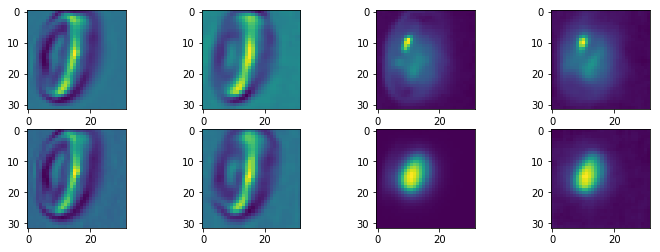

(4, 256, 64)
Epoch:  50 Iteration:  400 Loss:  85.92259
(32, 32, 4) (4, 32, 32, 1)


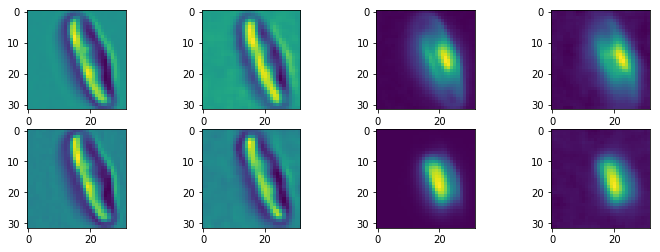

(4, 256, 64)
Epoch:  51 Iteration:  0 Loss:  78.71475
(32, 32, 4) (4, 32, 32, 1)


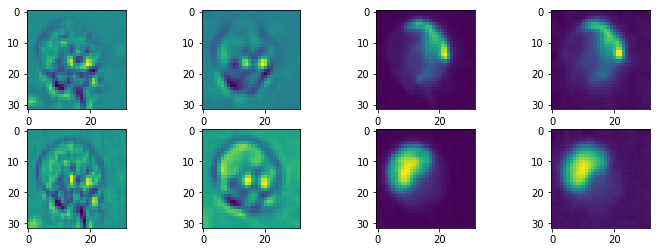

(4, 256, 64)
Epoch:  51 Iteration:  400 Loss:  84.27587
(32, 32, 4) (4, 32, 32, 1)


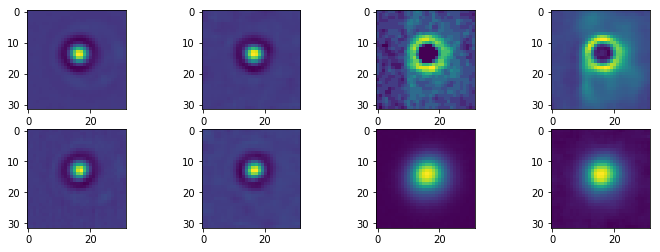

(4, 256, 64)
Epoch:  52 Iteration:  0 Loss:  78.85345
(32, 32, 4) (4, 32, 32, 1)


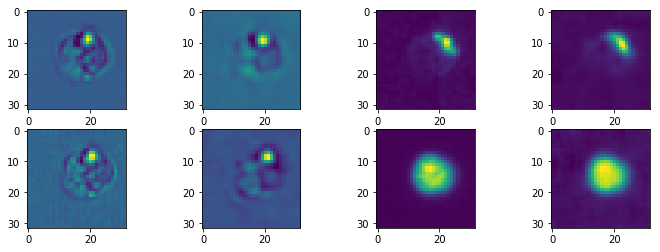

(4, 256, 64)
Epoch:  52 Iteration:  400 Loss:  83.83392
(32, 32, 4) (4, 32, 32, 1)


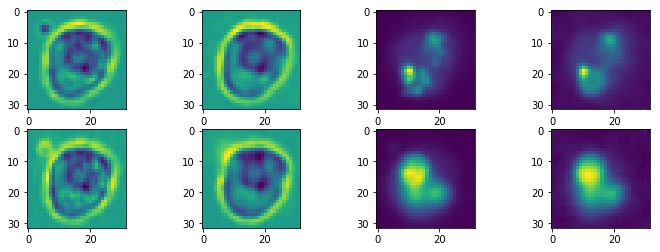

(4, 256, 64)
Epoch:  53 Iteration:  0 Loss:  78.19372
(32, 32, 4) (4, 32, 32, 1)


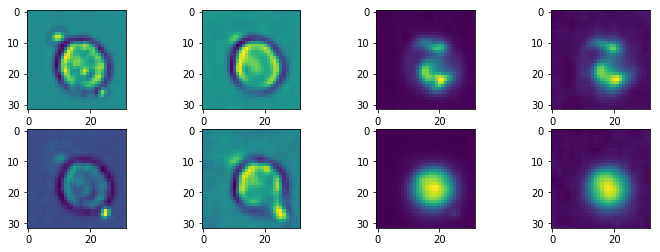

(4, 256, 64)
Epoch:  53 Iteration:  400 Loss:  83.89174
(32, 32, 4) (4, 32, 32, 1)


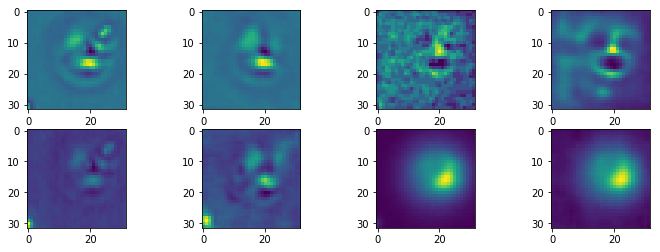

(4, 256, 64)
Epoch:  54 Iteration:  0 Loss:  77.49329
(32, 32, 4) (4, 32, 32, 1)


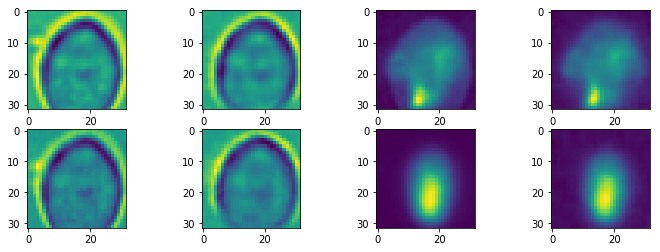

(4, 256, 64)
Epoch:  54 Iteration:  400 Loss:  83.4062
(32, 32, 4) (4, 32, 32, 1)


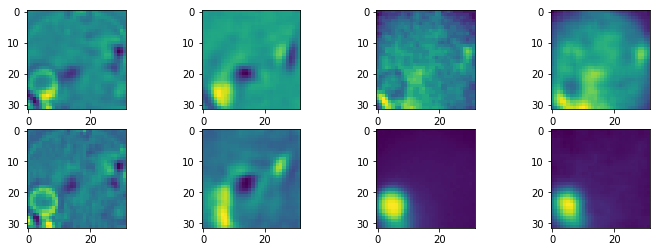

(4, 256, 64)
Epoch:  55 Iteration:  0 Loss:  77.7522
(32, 32, 4) (4, 32, 32, 1)


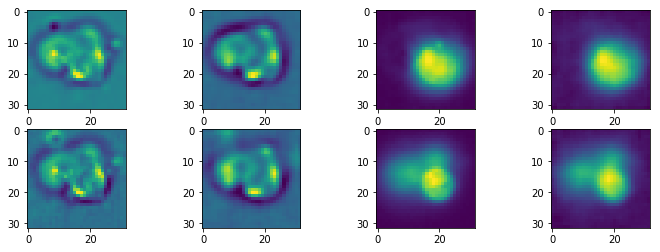

(4, 256, 64)
Epoch:  55 Iteration:  400 Loss:  84.23049
(32, 32, 4) (4, 32, 32, 1)


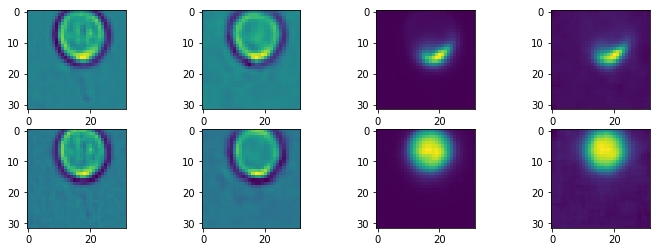

(4, 256, 64)
Epoch:  56 Iteration:  0 Loss:  77.64768
(32, 32, 4) (4, 32, 32, 1)


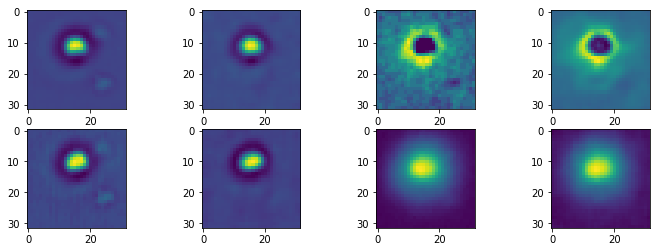

(4, 256, 64)
Epoch:  56 Iteration:  400 Loss:  82.94879
(32, 32, 4) (4, 32, 32, 1)


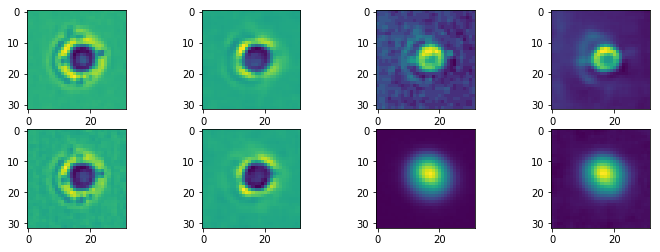

(4, 256, 64)
Epoch:  57 Iteration:  0 Loss:  77.70603
(32, 32, 4) (4, 32, 32, 1)


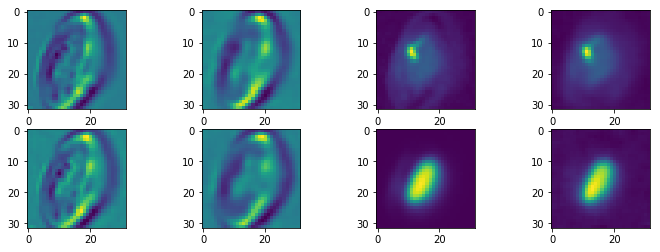

(4, 256, 64)
Epoch:  57 Iteration:  400 Loss:  82.55289
(32, 32, 4) (4, 32, 32, 1)


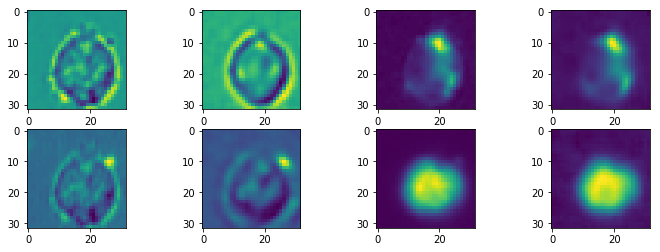

(4, 256, 64)
Epoch:  58 Iteration:  0 Loss:  76.8857
(32, 32, 4) (4, 32, 32, 1)


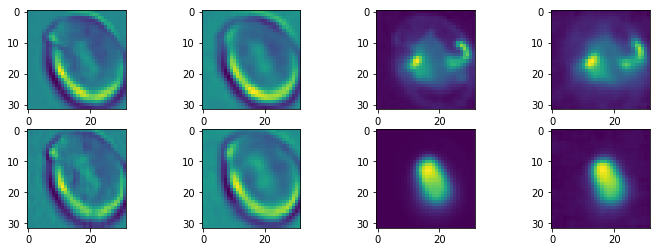

(4, 256, 64)
Epoch:  58 Iteration:  400 Loss:  82.82161
(32, 32, 4) (4, 32, 32, 1)


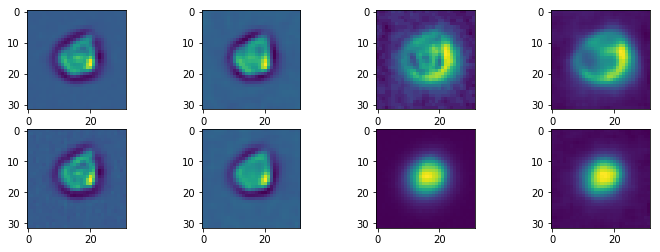

(4, 256, 64)
Epoch:  59 Iteration:  0 Loss:  76.69112
(32, 32, 4) (4, 32, 32, 1)


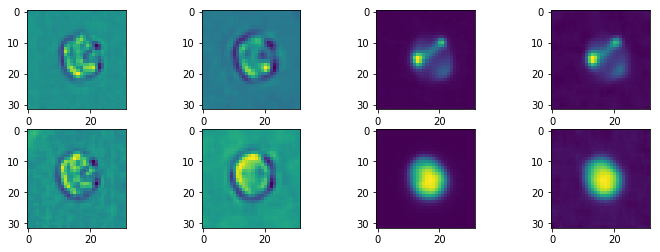

(4, 256, 64)
Epoch:  59 Iteration:  400 Loss:  82.45765
(32, 32, 4) (4, 32, 32, 1)


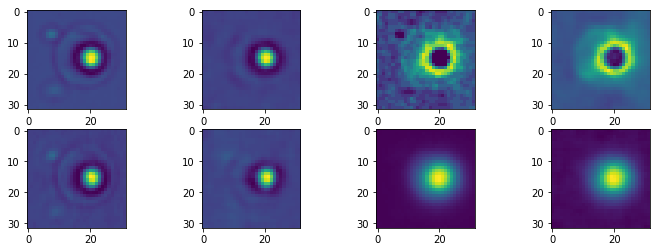

Done


In [8]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 4
p_channels = [0,1,3,4]
p_nepochs = 60
p_batchsize = 256
p_learning_rate = 0.0001  #.00005
p_restore = False
p_latent_size = 64 #128 + 64
p_droprate = 0.95
p_stdev = .04
p_slam = .00005
p_denoise = None
enc_sizes = [(128, 3), (256, 3), (512, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev
params['slam'] = p_slam
params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes
params['denoise'] = p_denoise
cpdir = "/v/Data/cyto/Checkpoints/2018-06-14-Channels/"

if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_channels.train(p_mmdict, p_df, params, 400, cpdir)

In [ ]:
x = 4
x